<IPython.core.display.Javascript object>


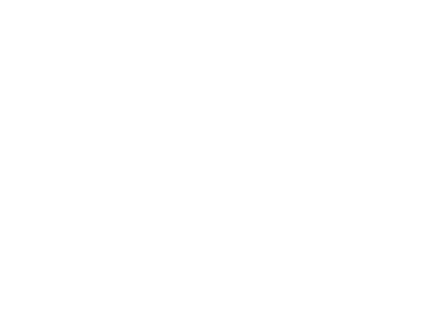

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from mpl_toolkits.mplot3d import Axes3D

cancer = load_breast_cancer()

X = []
for target in range(2):
    X.append([[],[]])
    for i in range(len(cancer.data)):
        if (cancer.target[i] == target):
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            
colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0], X[target][1], c=colours[target])
    
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

<IPython.core.display.Javascript object>


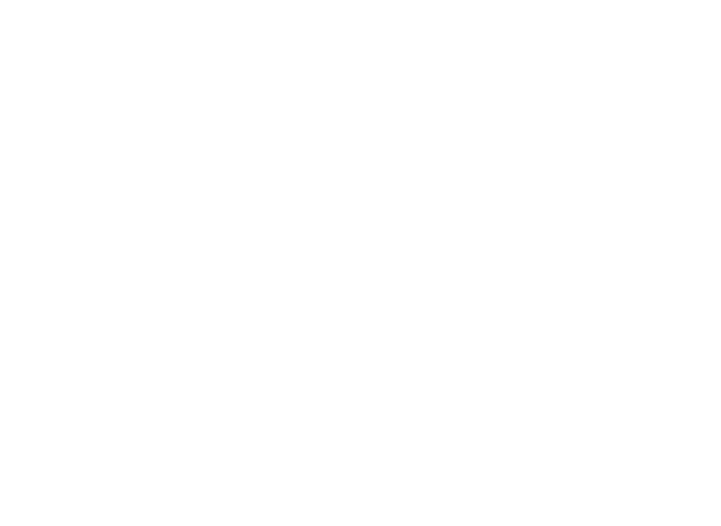

In [2]:
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)):
        if (cancer.target[i] == target):
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])
            
colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(18, 15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0], X[target][1], X[target][2], c=colours[target])
    
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

In [3]:
import matplotlib.patches as mpatches
import pandas as pd

cancer = load_breast_cancer()
x = cancer.data[:, 0]
y = cancer.target # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'} # 0: malignant, 1: benign

plt.scatter(x, y, facecolors='none', edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]), cmap=colors)

plt.xlabel("mean radius")
plt.ylabel("Result")

red = mpatches.Patch(color='red', label='malignant')
blue = mpatches.Patch(color='blue', label='benign')

plt.legend(handles=[red, blue], loc=1)

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

In [4]:
from sklearn import linear_model
import numpy as np

log_regress = linear_model.LogisticRegression()

log_regress.fit(X = np.array(x).reshape(len(x), 1), y = y)

print(log_regress.intercept_)
print(log_regress.coef_)

[15.120902]
[[-1.02475609]]


In [5]:
def sigmoid(x):
    return (1 / (1 + np.exp(-(log_regress.intercept_[0] + log_regress.coef_[0][0] * x))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.scatter(x, y, facecolors = 'none', edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]), cmap=colors)

plt.plot(x1, y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

In [6]:
print(log_regress.predict_proba([[20]]))
print(log_regress.predict([[20]]))

print(log_regress.predict_proba([[14.75]]))
print(log_regress.predict([[14.75]]))

[[0.99538685 0.00461315]]
[0]
[[0.49856257 0.50143743]]
[1]


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set, train_labels, test_labels = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=1, stratify=cancer.target)

x = train_set[:,0:30]
y = train_labels
log_regress = linear_model.LogisticRegression()
log_regress.fit(X=x, y=y)

print(log_regress.intercept_)
print(log_regress.coef_)

[0.10454441]
[[ 0.59396857  0.52535329  0.51420325 -0.03168248 -0.0164435  -0.09248078
  -0.13107337 -0.0519281  -0.03020603 -0.00439707  0.02766815  0.14187445
   0.0288671  -0.10828961 -0.00145443 -0.02181675 -0.02988913 -0.00695528
  -0.00567133 -0.0020866   0.68780437 -0.57458147 -0.31409314 -0.00622161
  -0.03322475 -0.31273276 -0.39371778 -0.1061693  -0.08981477 -0.02924339]]


C:\Users\CSR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

preds_prob.columns = ["Malignant", "Benign"]

preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

# print(type(preds_prob))
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
result.head()

,Malignant,Benign,Prediction,Original Result
0,0.999819,1.806293e-04,0,0
1,0.999681,3.188900e-04,0,0
2,0.165953,8.340469e-01,1,1
3,1.000000,7.170901e-09,0,0
4,0.090603,9.093973e-01,1,0


<h3> Confusion Matrix</h3>

In [9]:
print("---Confusion Matrix---")
pd.crosstab(preds, test_labels)

---Confusion Matrix---


col_0,0,1
row_0,,
0,48,4
1,5,86


In [11]:
from sklearn import metrics

print(metrics.confusion_matrix(y_true = test_labels, y_pred = preds))

[[48  5]
 [ 4 86]]


<h3>Accuracy, Recall, Precision ... </h3>

In [14]:
print("---Accuracy---")
print(log_regress.score(X = test_set, y = test_labels))

---Accuracy---
0.9370629370629371


In [16]:
print("---Metrices---")
print(metrics.classification_report(y_true=test_labels, y_pred = preds))

---Metrices---
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



<h3>Receiver Operating Characteristic (ROC) Curve</h3>

In [19]:
from sklearn.metrics import roc_curve, auc

probs = log_regress.predict_proba(test_set)
preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(test_labels, preds)

print(fpr)
print(tpr)
print(threshold)

[0.         0.         0.         0.01886792 0.01886792 0.03773585
 0.03773585 0.05660377 0.05660377 0.0754717  0.0754717  0.13207547
 0.13207547 0.16981132 0.16981132 0.22641509 0.22641509 1.        ]
[0.         0.01111111 0.66666667 0.66666667 0.87777778 0.87777778
 0.92222222 0.92222222 0.93333333 0.93333333 0.95555556 0.95555556
 0.97777778 0.97777778 0.98888889 0.98888889 1.         1.        ]
[1.99994096e+00 9.99940962e-01 9.80391688e-01 9.80256928e-01
 9.19284604e-01 9.09397303e-01 8.40237933e-01 8.35844593e-01
 8.34046934e-01 7.66267602e-01 7.30344156e-01 2.81783341e-01
 2.68158161e-01 7.31752468e-02 7.16376246e-02 3.25703594e-02
 1.15593037e-02 3.49213954e-20]


<IPython.core.display.Javascript object>


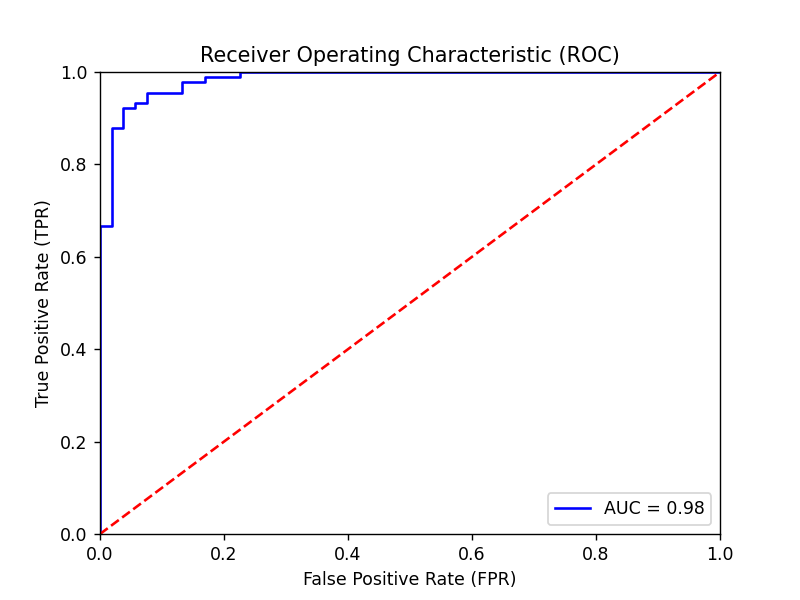

In [20]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()